In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 123MB/s] 
100% 1.06G/1.06G [00:12<00:00, 90.4MB/s]


In [ ]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
##normalizing dataset
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [ ]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
validation_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
## model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 100s 133ms/step - loss: 0.8504 - accuracy: 0.6328 - val_loss: 0.5704 - val_accuracy: 0.7044
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5194 - accuracy: 0.7422 - val_loss: 0.6041 - val_accuracy: 0.6806
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4320 - accuracy: 0.8033 - val_loss: 0.5102 - val_accuracy: 0.7434
Epoch 4/10
625/625 [==============================] - 74s 118ms/step - loss: 0.3370 - accuracy: 0.8547 - val_loss: 0.4304 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 84s 133ms/step - loss: 0.2497 - accuracy: 0.8942 - val_loss: 0.4197 - val_accuracy: 0.8128
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.1596 - accuracy: 0.9352 - val_loss: 0.3793 - val_accuracy: 0.8756
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0992 - accuracy: 0.9614 - val_loss: 0.4631 - val_a

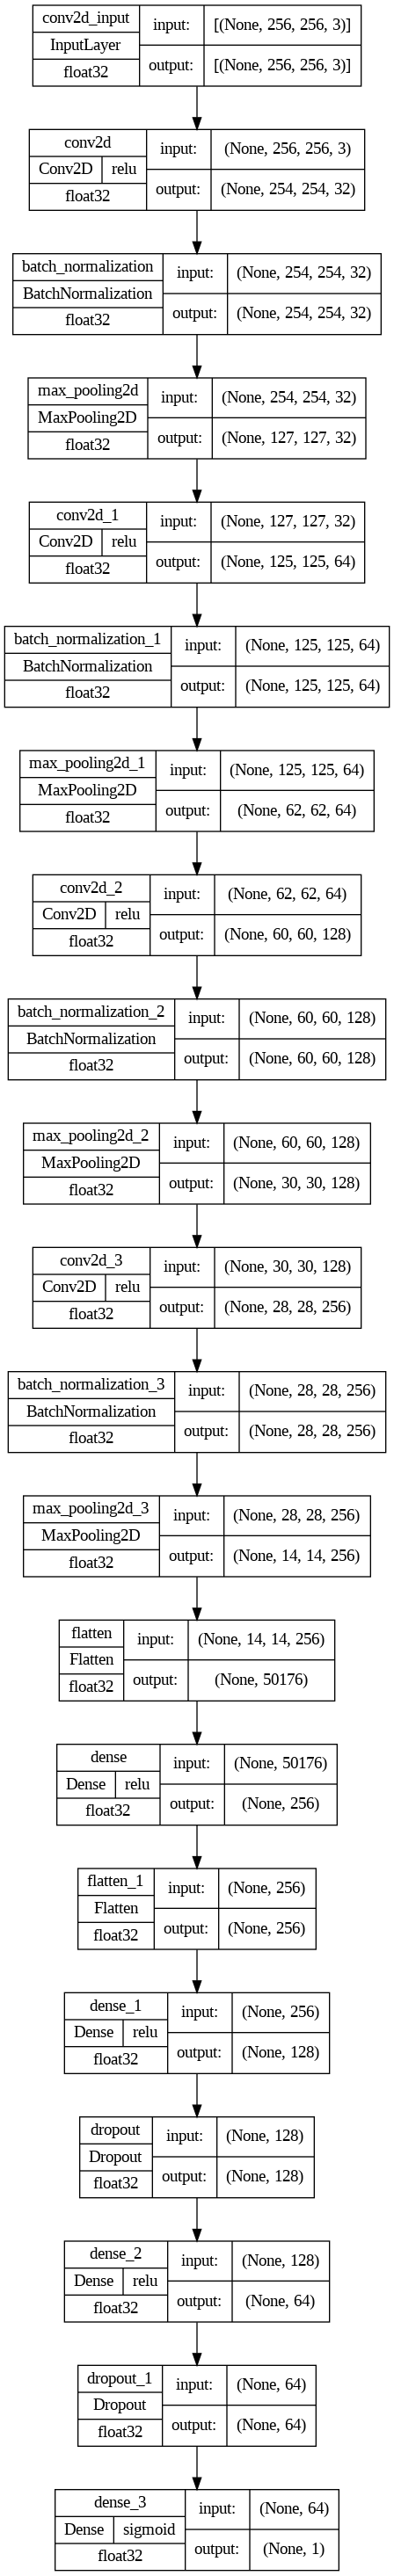

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

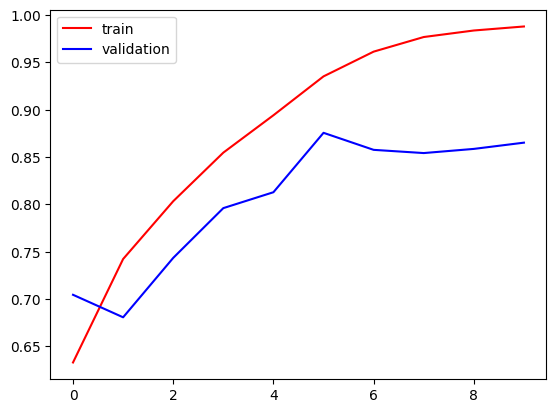

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

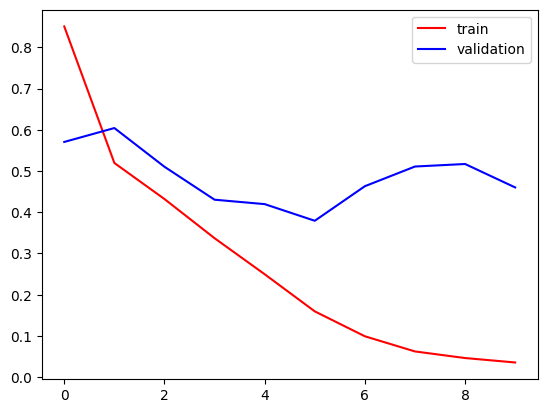

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

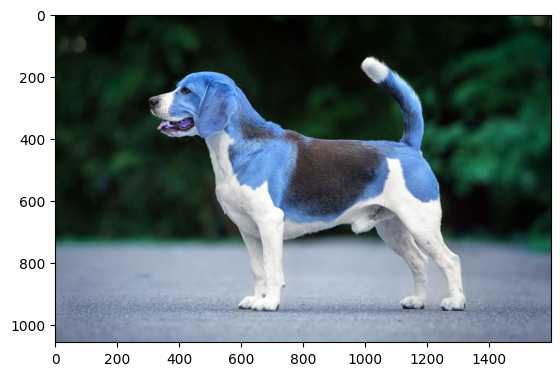

In [ ]:
import cv2
testimage = cv2.imread('/content/sample_data/beagle-hound-dog.webp')
plt.imshow(testimage)

In [ ]:
print(testimage.shape)
testimage = cv2.resize(testimage,(256,256)) #Resizing to 256x256
testimage = testimage.reshape((1,256,256,3))

(1057, 1600, 3)


In [ ]:
testimage.shape

(1, 256, 256, 3)

In [ ]:
output = model.predict(testimage)

1/1 [==============================] - 0s 23ms/step


In [ ]:
output

array([[1.]], dtype=float32)

In [ ]:
if output>0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

It's a dog!


save model

In [ ]:
model.save("cstvsdat_cnn_classification.h5")

In [ ]:
path="/content/drive/MyDrive/Deep Learning/Models/catvsdat_cnn_classification.h5"
model.save(path)

Working with saved models

(159, 317, 3)


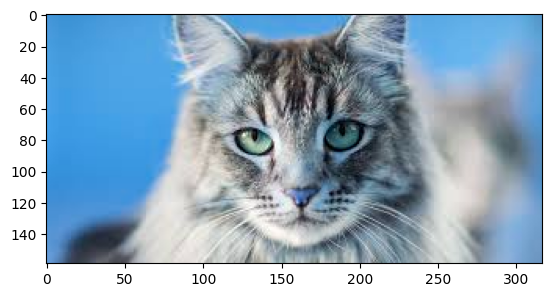

In [4]:
import cv2
testimage2 = cv2.imread('/content/sample_data/cat2.jpeg')
plt.imshow(testimage2)
print(testimage2.shape)
testimage2 = cv2.resize(testimage2,(256,256)) #Resizing to 256x256
testimage2 = testimage2.reshape((1,256,256,3))

In [5]:
catvsdogmodel=keras.models.load_model("/content/drive/MyDrive/Deep Learning/Models/catvsdat_cnn_classification.h5")

In [6]:
output = catvsdogmodel.predict(testimage2)
if output>0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 8s 8s/step
It's a cat!


converting to tflite

In [ ]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()

TF_LITE_MODEL_FILE_NAME="catvsdat_cnn_classification.tflite"
open("/content/drive/MyDrive/Deep Learning/Models/catvsdat_cnn_classificationV2.tflite","wb").write(tflite_model)

53111868